<a href="https://colab.research.google.com/github/yongug/Fly_python/blob/main/2%EC%A1%B0_digital_literacy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PC / 스마트폰 / 모바일 / 스마트 패드 등 보유 유무와 PC이용 능력에 따른 Digital Literacy 다중선형회귀**

In [2]:
# 필요한 라이브러리 설치
!pip install pandas scikit-learn matplotlib seaborn

import pandas as pd
import io

# 업로드한 파일 읽기
# df = pd.read_excel(io.BytesIO(uploaded['processed_digital_literacy_data.xlsx']))

df = pd.read_csv('./disabled_data.csv')
# 데이터 확인
df.head()


,ID,TYP,Q1A1,Q1A2,Q2A11,Q2A12,Q2A13,Q2A2,Q2A3,Q3,...,CDQ13A5,CDQ13A6,CDQ13A7,CDQ13A8,CDQ14,CDQ15,CDQ161,CDQ162,CDQ163,WT_T
0,303577,3,1,1,1,,,1,1,1,...,,,,,2,5,11,2,2,0.090909
1,304824,3,1,1,1,,,1,1,1,...,,,,,2,1,12,2,2,0.090909
2,303454,3,1,1,1,,,1,2,1,...,,,,,2,3,8,1,1,0.066667
3,314979,3,1,1,1,,,1,2,1,...,,,,,2,1,8,2,2,0.066667
4,312878,3,1,1,1,,,1,2,1,...,,,,,2,2,11,2,2,0.090909


In [3]:
# 결측값 처리 (필요 시)
df = df.dropna()

# 피처와 타겟 변수 설정
X = df[['Q1A1', 'Q1A2', 'Q2A11', 'Q3', 'Q4A1']]
y = df['Q29A01']

# 문자열 데이터를 숫자로 변환
X = X.apply(pd.to_numeric, errors='coerce')
y = pd.to_numeric(y, errors='coerce')

# 다시 결측값 처리 (평균으로 대체)
X.fillna(X.mean(), inplace=True)
y.fillna(y.mean(), inplace=True)


# 데이터셋 분리
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 모델 생성
model = LinearRegression()

# 모델 학습
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 모델 평가
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)


Mean Squared Error: 0.583680484316902
R^2 Score: 0.649866944611843


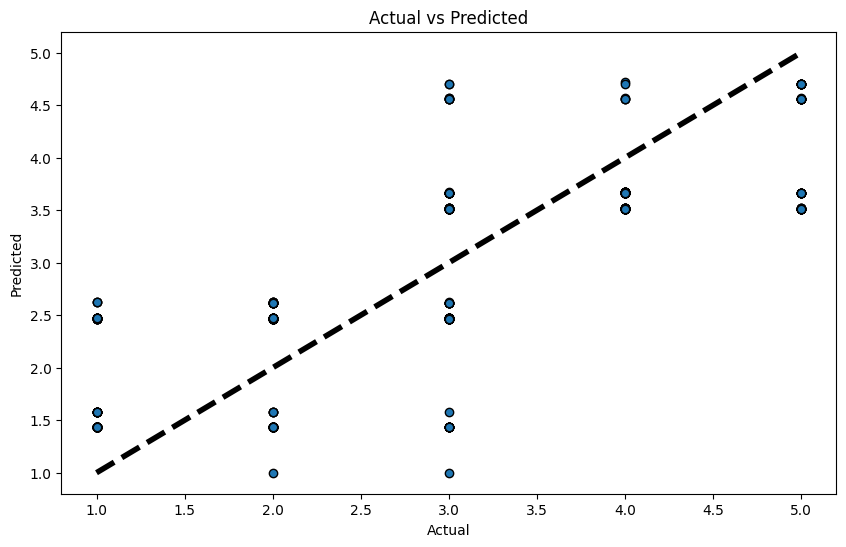

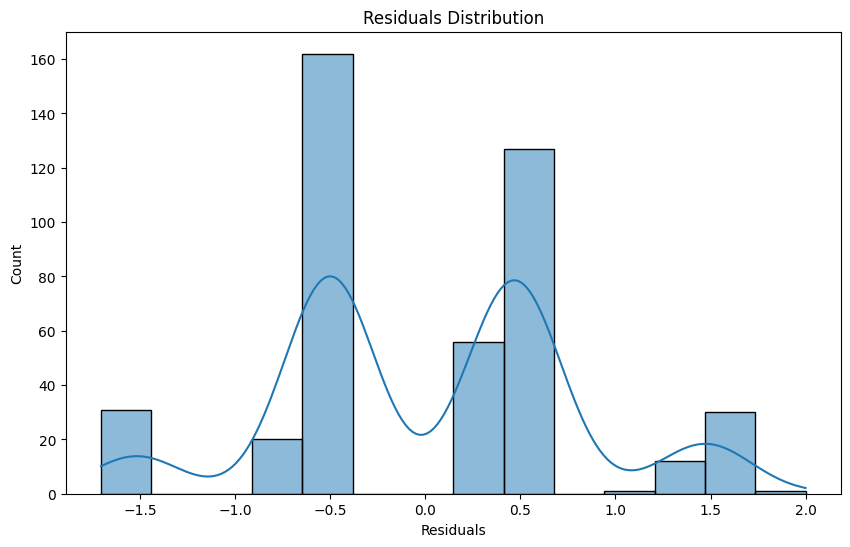

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# 실제 값 vs 예측 값
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, edgecolors=(0, 0, 0))
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

# 잔차 플롯
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.title('Residuals Distribution')
plt.show()
